In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time
import re
from selenium.webdriver.common.action_chains import ActionChains
import csv
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
def filter_by_month(updated_data, target_month):
    filtered_data = [row for row in updated_data if row[0].split('/')[1] == target_month]
    return filtered_data
def convert_date(date_str):
    # Tách phần ngày tháng trước "lúc"
    date_part = date_str.split(' lúc ')[0]
    # Bỏ "Thứ ..." và "Tháng"
    clean_date = ' '.join(date_part.split(',')[1:]).replace('Tháng ', '').strip()
    # Chuyển đổi chuỗi sang định dạng ngày tháng
    date_object = datetime.strptime(clean_date, '%d %m %Y')
    return date_object.strftime('%d/%m/%Y')

In [ ]:
chrome_options = Options()
chrome_options.add_argument("--disable-notifications") 
chrome_options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
page_slug = 'SVNAutomation'
try:
    # Login to Facebook
    driver.get('https://www.facebook.com/')
    script = 'javascript:void(function(){ function setCookie(t) { var list = t.split("; "); console.log(list); for (var i = list.length - 1; i >= 0; i--) { var cname = list[i].split("=")[0]; var cvalue = list[i].split("=")[1]; var d = new Date(); d.setTime(d.getTime() + (7*24*60*60*1000)); var expires = ";domain=.facebook.com;expires="+ d.toUTCString(); document.cookie = cname + "=" + cvalue + "; " + expires; } } function hex2a(hex) { var str = ""; for (var i = 0; i < hex.length; i += 2) { var v = parseInt(hex.substr(i, 2), 16); if (v) str += String.fromCharCode(v); } return str; } setCookie("sb=8A7xZpRvceNlNa8_L10H6gmO; datr=8A7xZkEKqe6MmLFSnTcYpyte; ps_l=1; ps_n=1; dpr=1.25; locale=vi_VN; c_user=100023060713820; xs=47%3A9W11fUd-wzjQJg%3A2%3A1732613299%3A-1%3A6175; fr=1TWusVqVfBBvdBTZb.AWWwuLIVn1TqETV-ZGvcG2OJss0.BnRWz1..AAA.0.0.BnRZS1.AWXfJ_BMwIE"); location.href = "https://facebook.com"; })();'
    driver.execute_script(script) # Wait for login to complete

    # Navigate to the Facebook page
    driver.get(f'https://www.facebook.com/{page_slug}')
    time.sleep(5)
    post_id_list = []
    post_video = []
    i = 1
    max_retries = 3
    retry_count = 0
    actions = ActionChains(driver)
    while True:
        try:
            element = driver.find_element(By.XPATH, f'/html/body/div[1]/div/div[1]/div/div[3]/div/div/div[1]/div[1]/div/div/div[4]/div[2]/div/div[2]/div[3]/div[{i}]/div/div/div/div/div/div/div/div/div/div/div/div[13]/div/div/div[2]/div/div[2]/div/div[2]/span/div/span[1]/span/span/a')
            actions.move_to_element(element).perform()
            element_2 = driver.find_element(By.XPATH, '/html/body/div[1]/div/div[1]/div/div[3]/div/div/div[2]/div')
            text = element_2.text
            print("Số tương tác:", text)
            href = element.get_attribute("href")
            match = re.search(r'pfbid[a-zA-Z0-9]+', href)
            if match:
                result = match.group()  
                post_id_list.append(result)
            else:
                print("No match found")
            i += 1
            retry_count = 0
        except Exception as e:
            print(f"Error: {e}")
            driver.execute_script('window.scrollBy(0, window.innerHeight);')
            time.sleep(2) 
            current_scroll_height = driver.execute_script("return document.documentElement.scrollTop + window.innerHeight;")
            total_scroll_height = driver.execute_script("return document.documentElement.scrollHeight;")

            if current_scroll_height == total_scroll_height:  # Nếu đã đến cuối trang
                print("Reached the bottom of the page.")
                break  

            # Nếu trang vẫn còn cuộn nhưng không tìm thấy phần tử, tăng số lần thử
            retry_count += 1
            if retry_count >= max_retries:  # Dừng vòng lặp nếu thử quá nhiều lần mà không tìm được phần tử
                print("Max retries reached, breaking the loop.")
                break
    print(len(post_id_list))
    for post_id in post_id_list:
        print(post_id)
        driver.get(f'https://www.facebook.com/{page_slug}/posts/{post_id}')
        try:
            # Xác định phần tử theo XPath
            element = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[1]/div/div[5]/div/div/div[2]/div/div/div/div/div/div/div/div[2]/div[2]/div/div/div/div/div/div/div/div/div/div/div/div/div[13]/div/div/div[2]/div/div[2]/div/div[2]/span/div/span[1]/span/span/a")
            # Tạo hành động hover
            actions = ActionChains(driver)
            actions.move_to_element(element).perform()
            time.sleep(1)
            element_2 = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[1]/div/div[5]/div/div/div[3]/div/div/div[1]/div[1]/div[1]/span")
            hidden_text = element_2.text  # Hoặc dùng get_attribute nếu text nằm trong một thuộc tính
            print("Nội dung ẩn:", hidden_text)
        except Exception as e:
            print(f"Lỗi: {e}")

        element = driver.find_element(By.XPATH, f"/html/body/div[1]/div/div[1]/div/div[5]/div/div/div[2]/div/div/div/div/div/div/div/div[2]/div[2]/div/div/div/div/div/div/div/div/div/div/div/div/div[13]/div/div/div[4]/div/div/div[1]/div/div[1]/div/div[1]/div/span/div/span[1]/span/span")
        text = element.text
        print("Số tương tác:", text)
        post_video.append([hidden_text,int(text)])
    updated_data = [[convert_date(row[0]), row[1]] for row in post_video]

    # In kết quả
    print(updated_data)
except Exception as e:
    print("Error:", e)

Số tương tác: Thứ Tư, 20 Tháng 11, 2024 lúc 13:21
Số tương tác: 
Số tương tác: 
Số tương tác: Thứ Hai, 18 Tháng 11, 2024 lúc 13:01
Số tương tác: 
Số tương tác: 
Số tương tác: 
Số tương tác: 
Error: Message: no such element: Unable to locate element: {"method":"xpath","selector":"/html/body/div[1]/div/div[1]/div/div[3]/div/div/div[1]/div[1]/div/div/div[4]/div[2]/div/div[2]/div[3]/div[9]/div/div/div/div/div/div/div/div/div/div/div/div[13]/div/div/div[2]/div/div[2]/div/div[2]/span/div/span[1]/span/span/a"}
  (Session info: chrome=131.0.6778.86); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00DB33E3+25059]
	(No symbol) [0x00D3CDE4]
	(No symbol) [0x00C1BEC3]
	(No symbol) [0x00C5FD86]
	(No symbol) [0x00C5FFCB]
	(No symbol) [0x00C9D952]
	(No symbol) [0x00C81F44]
	(No symbol) [0x00C9B51E]
	(No symbol) [0x00C81C96]
	(No symbol) [0x00C53FAC]
	(No symbol) [0x00C54F

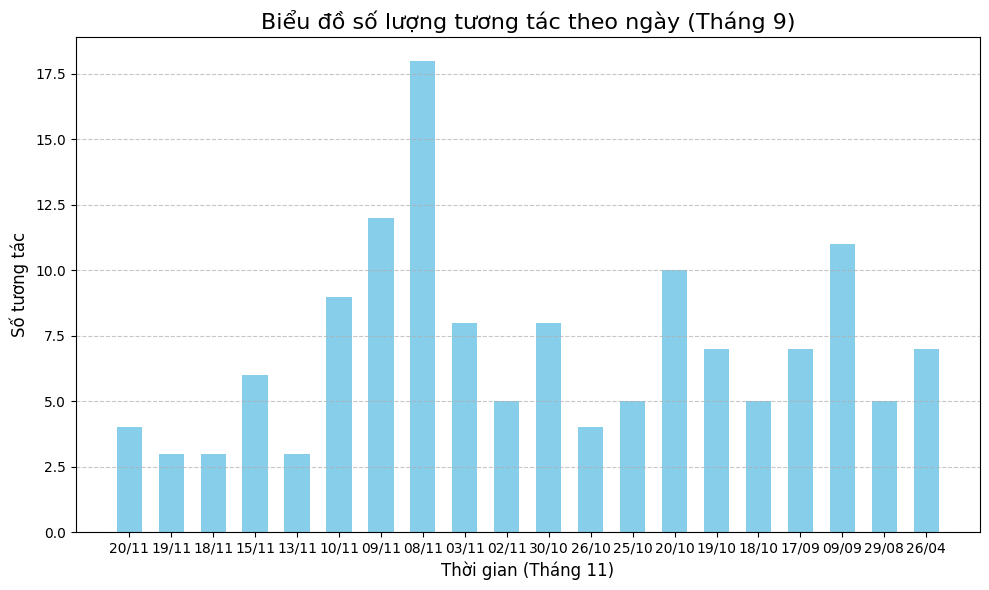

In [18]:
# filtered_data = filter_by_month(updated_data, "09")

# Tách dữ liệu sau khi lọc thành ngày và giá trị
dates = [row[0] for row in updated_data]
values = [int(row[1]) for row in updated_data]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))  # Kích thước biểu đồ
plt.bar(dates, values, color='skyblue', width=0.6)  # Vẽ cột với chiều rộng 0.6

# Tùy chỉnh biểu đồ
plt.title('Biểu đồ số lượng tương tác theo ngày (Tháng 9)', fontsize=16)  # Tiêu đề
plt.xlabel('Thời gian (Tháng 11)', fontsize=12)  # Nhãn trục X
plt.ylabel('Số tương tác', fontsize=12)  # Nhãn trục Y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới ngang

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh để không bị cắt nội dung
plt.show()

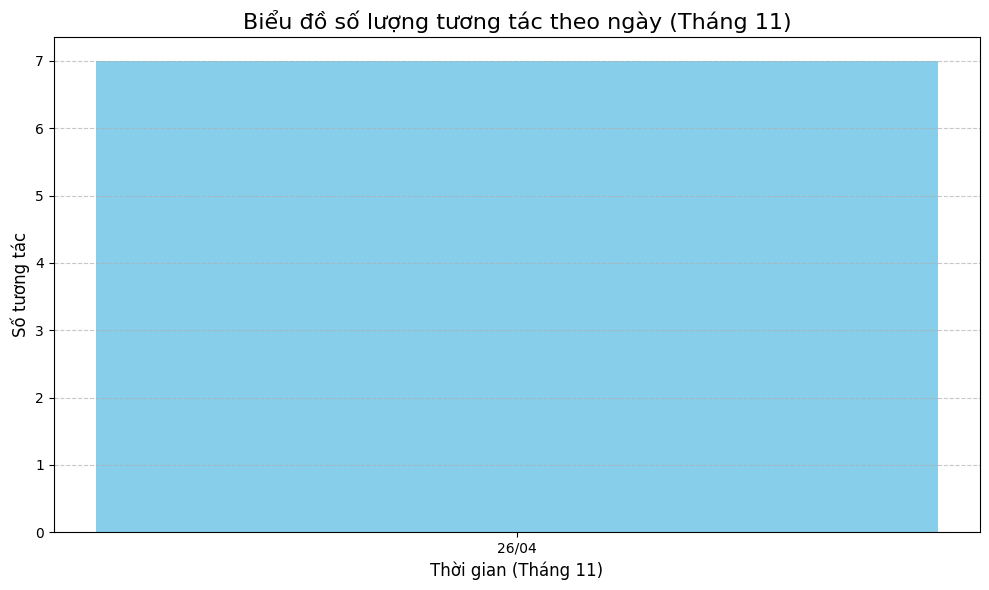

In [14]:
filtered_data = filter_by_month(updated_data, "04")

# Tách dữ liệu sau khi lọc thành ngày và giá trị
dates = [row[0] for row in filtered_data]
values = [int(row[1]) for row in filtered_data]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))  # Kích thước biểu đồ
plt.bar(dates, values, color='skyblue', width=0.6)  # Vẽ cột với chiều rộng 0.6

# Tùy chỉnh biểu đồ
plt.title('Biểu đồ số lượng tương tác theo ngày (Tháng 11)', fontsize=16)  # Tiêu đề
plt.xlabel('Thời gian (Tháng 11)', fontsize=12)  # Nhãn trục X
plt.ylabel('Số tương tác', fontsize=12)  # Nhãn trục Y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới ngang

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh để không bị cắt nội dung
plt.show()

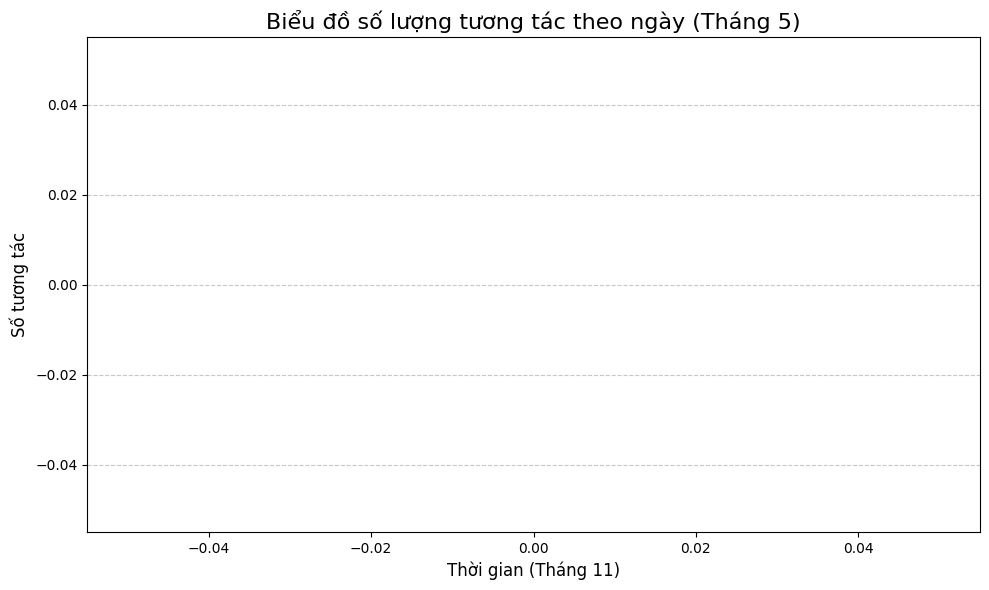

In [ ]:
filtered_data = filter_by_month(updated_data, "")

# Tách dữ liệu sau khi lọc thành ngày và giá trị
dates = [row[0] for row in filtered_data]
values = [int(row[1]) for row in filtered_data]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))  # Kích thước biểu đồ
plt.bar(dates, values, color='skyblue', width=0.6)  # Vẽ cột với chiều rộng 0.6

# Tùy chỉnh biểu đồ
plt.title('Biểu đồ số lượng tương tác theo ngày (Tháng 5)', fontsize=16)  # Tiêu đề
plt.xlabel('Thời gian (Tháng 11)', fontsize=12)  # Nhãn trục X
plt.ylabel('Số tương tác', fontsize=12)  # Nhãn trục Y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới ngang

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh để không bị cắt nội dung
plt.show()